# Simplified Phishing URL Detection 

The Internet has become an indispensable part of our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. 

This simplified version focuses on three essential machine learning algorithms: **Logistic Regression**, **Naive Bayes**, and **Decision Tree** to detect phishing websites efficiently.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training three models (Logistic Regression, Naive Bayes, Decision Tree)
6. Model Comparison
7. Saving the best model
8. Conclusion

In [3]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:

The dataset is borrowed from the original phishing detection project. It contains website URLs with their corresponding features and class labels identifying them as phishing websites or legitimate (1 for phishing, 0 for legitimate).

The overview of this dataset shows it has 11,000+ samples with 30+ features.

In [4]:
# Loading data into dataframe
data = pd.read_csv("../data/phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [5]:
# Shape of dataframe
print("Dataset Shape:", data.shape)
print("\nColumn Names:")
print(data.columns.tolist())
print("\nDataset Info:")
data.info()

Dataset Shape: (11054, 32)

Column Names:
['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//', 'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon', 'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage', 'StatsReport', 'class']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Re

In [6]:
# Check for missing values and data types
print("Missing values per column:")
print(data.isnull().sum())
print("\nUnique values per column:")
print(data.nunique())
print("\nDataset Description:")
data.describe().T

Missing values per column:
Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

Unique values per column:
Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@          

,count,mean,std,min,25%,50%,75%,max
Index,11054.0,5526.500000,3191.159272,0.0,2763.25,5526.5,8289.75,11053.0
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.00,1.0,1.00,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.00,-1.0,-1.00,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.00,1.0,1.00,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.00,1.0,1.00,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.00,1.0,1.00,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.00,-1.0,-1.00,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.00,0.0,1.00,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.00,1.0,1.00,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.00,-1.0,1.00,1.0


## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and how features are related to each other.

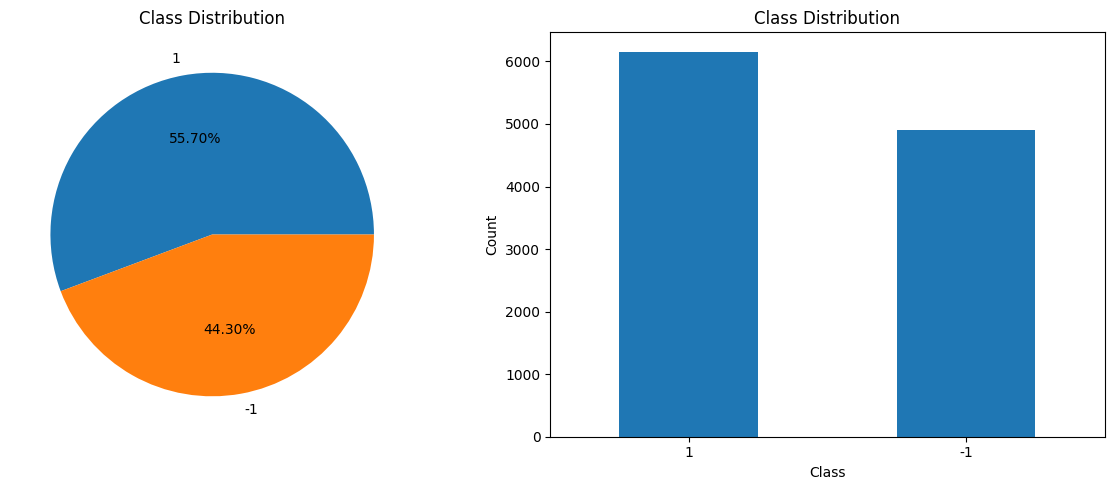

Class Distribution:
class
 1    6157
-1    4897
Name: count, dtype: int64


In [7]:
# Class distribution visualization
plt.figure(figsize=(12, 5))

# Pie chart for class distribution
plt.subplot(1, 2, 1)
data['class'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title("Class Distribution")
plt.ylabel("")

# Bar chart for class distribution  
plt.subplot(1, 2, 2)
data['class'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print("Class Distribution:")
print(data['class'].value_counts())

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [8]:
# Splitting the dataset into dependent and independent features
X = data.drop(["class"], axis=1)
y = data["class"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())

Features shape: (11054, 31)
Target shape: (11054,)

Feature columns:
['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//', 'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon', 'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL', 'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL', 'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick', 'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage', 'StatsReport']


In [9]:
# Splitting the dataset into train and test sets: 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8843, 31) (8843,)
Testing set shape: (2211, 31) (2211,)


## 5. Model Building & Training:
   
Supervised machine learning is used to predict phishing websites from given features. Our dataset comes under classification problem. The supervised machine learning models considered to train the dataset in this simplified version are:

1. **Logistic Regression**
2. **Naive Bayes**  
3. **Decision Tree**

The metrics considered to evaluate the model performance are **Accuracy**, **F1-score**, **Recall**, and **Precision**.

In [10]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

# Function to store results
def storeResults(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1_score.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d, 3))

## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [11]:
# Logistic Regression model
# Instantiate the model
log = LogisticRegression(random_state=42)

# Fit the model 
log.fit(X_train, y_train)

# Predicting the target value from the model for the samples
y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

print("Logistic Regression Model Trained Successfully!")

Logistic Regression Model Trained Successfully!


In [12]:
# Computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train, y_train_log)
acc_test_log = metrics.accuracy_score(y_test, y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train, y_train_log)
f1_score_test_log = metrics.f1_score(y_test, y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train, y_train_log)
recall_score_test_log = metrics.recall_score(y_test, y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train, y_train_log)
precision_score_test_log = metrics.precision_score(y_test, y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.918
Logistic Regression : Accuracy on test Data: 0.926

Logistic Regression : f1_score on training Data: 0.927
Logistic Regression : f1_score on test Data: 0.934

Logistic Regression : Recall on training Data: 0.938
Logistic Regression : Recall on test Data: 0.941

Logistic Regression : precision on training Data: 0.917
Logistic Regression : precision on test Data: 0.928


In [13]:
# Computing the classification report of the model
print("Classification Report for Logistic Regression:")
print(metrics.classification_report(y_test, y_test_log))

# Storing the results
storeResults('Logistic Regression', acc_test_log, f1_score_test_log, 
             recall_score_test_log, precision_score_test_log)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          -1       0.92      0.91      0.92       976
           1       0.93      0.94      0.93      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.93      2211
weighted avg       0.93      0.93      0.93      2211



## 5.2. Naive Bayes Classifier

Naive Bayes is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

In [14]:
# Naive Bayes model
# Instantiate the model
nb = GaussianNB()

# Fit the model
nb.fit(X_train, y_train)

# Predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

print("Naive Bayes Model Trained Successfully!")

Naive Bayes Model Trained Successfully!


In [15]:
# Computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train, y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test, y_test_nb)
print("Naive Bayes : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train, y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test, y_test_nb)
print("Naive Bayes : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train, y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test, y_test_nb)
print("Naive Bayes : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train, y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test, y_test_nb)
print("Naive Bayes : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes : Accuracy on training Data: 0.884
Naive Bayes : Accuracy on test Data: 0.885

Naive Bayes : f1_score on training Data: 0.890
Naive Bayes : f1_score on test Data: 0.890

Naive Bayes : Recall on training Data: 0.839
Naive Bayes : Recall on test Data: 0.838

Naive Bayes : precision on training Data: 0.946
Naive Bayes : precision on test Data: 0.950


In [16]:
# Computing the classification report of the model
print("Classification Report for Naive Bayes:")
print(metrics.classification_report(y_test, y_test_nb))

# Storing the results
storeResults('Naive Bayes', acc_test_nb, f1_score_test_nb, 
             recall_score_test_nb, precision_score_test_nb)

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

          -1       0.82      0.94      0.88       976
           1       0.95      0.84      0.89      1235

    accuracy                           0.88      2211
   macro avg       0.89      0.89      0.88      2211
weighted avg       0.89      0.88      0.89      2211



## 5.3. Decision Tree Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [17]:
# Decision Tree model
# Instantiate the model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Predicting the target value from the model for the samples
y_train_dt = dt.predict(X_train)
y_test_dt = dt.predict(X_test)

print("Decision Tree Model Trained Successfully!")

Decision Tree Model Trained Successfully!


In [18]:
# Computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_dt = metrics.accuracy_score(y_train, y_train_dt)
acc_test_dt = metrics.accuracy_score(y_test, y_test_dt)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_dt))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_dt))
print()

f1_score_train_dt = metrics.f1_score(y_train, y_train_dt)
f1_score_test_dt = metrics.f1_score(y_test, y_test_dt)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_dt))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_dt))
print()

recall_score_train_dt = metrics.recall_score(y_train, y_train_dt)
recall_score_test_dt = metrics.recall_score(y_test, y_test_dt)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_dt))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_dt))
print()

precision_score_train_dt = metrics.precision_score(y_train, y_train_dt)
precision_score_test_dt = metrics.precision_score(y_test, y_test_dt)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_dt))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_dt))

Decision Tree : Accuracy on training Data: 1.000
Decision Tree : Accuracy on test Data: 0.958

Decision Tree : f1_score on training Data: 1.000
Decision Tree : f1_score on test Data: 0.962

Decision Tree : Recall on training Data: 1.000
Decision Tree : Recall on test Data: 0.964

Decision Tree : precision on training Data: 1.000
Decision Tree : precision on test Data: 0.961


In [19]:
# Computing the classification report of the model
print("Classification Report for Decision Tree:")
print(metrics.classification_report(y_test, y_test_dt))

# Storing the results
storeResults('Decision Tree', acc_test_dt, f1_score_test_dt, 
             recall_score_test_dt, precision_score_test_dt)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



## 6. Model Comparison:

Let's compare the performance of all three models and select the best one.

In [20]:
# Creating a comparison dataframe
results_df = pd.DataFrame({
    'ML Model': ML_Model,
    'Accuracy': accuracy,
    'F1 Score': f1_score,
    'Recall': recall,
    'Precision': precision
})

print("Model Performance Comparison:")
print("=" * 70)
print(results_df)

# Find the best model based on accuracy
best_model_idx = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'ML Model']
best_accuracy = results_df.loc[best_model_idx, 'Accuracy']

print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy}")

Model Performance Comparison:
              ML Model  Accuracy  F1 Score  Recall  Precision
0  Logistic Regression     0.926     0.934   0.941      0.928
1          Naive Bayes     0.885     0.890   0.838      0.950
2        Decision Tree     0.958     0.962   0.964      0.961

Best Model: Decision Tree with Accuracy: 0.958


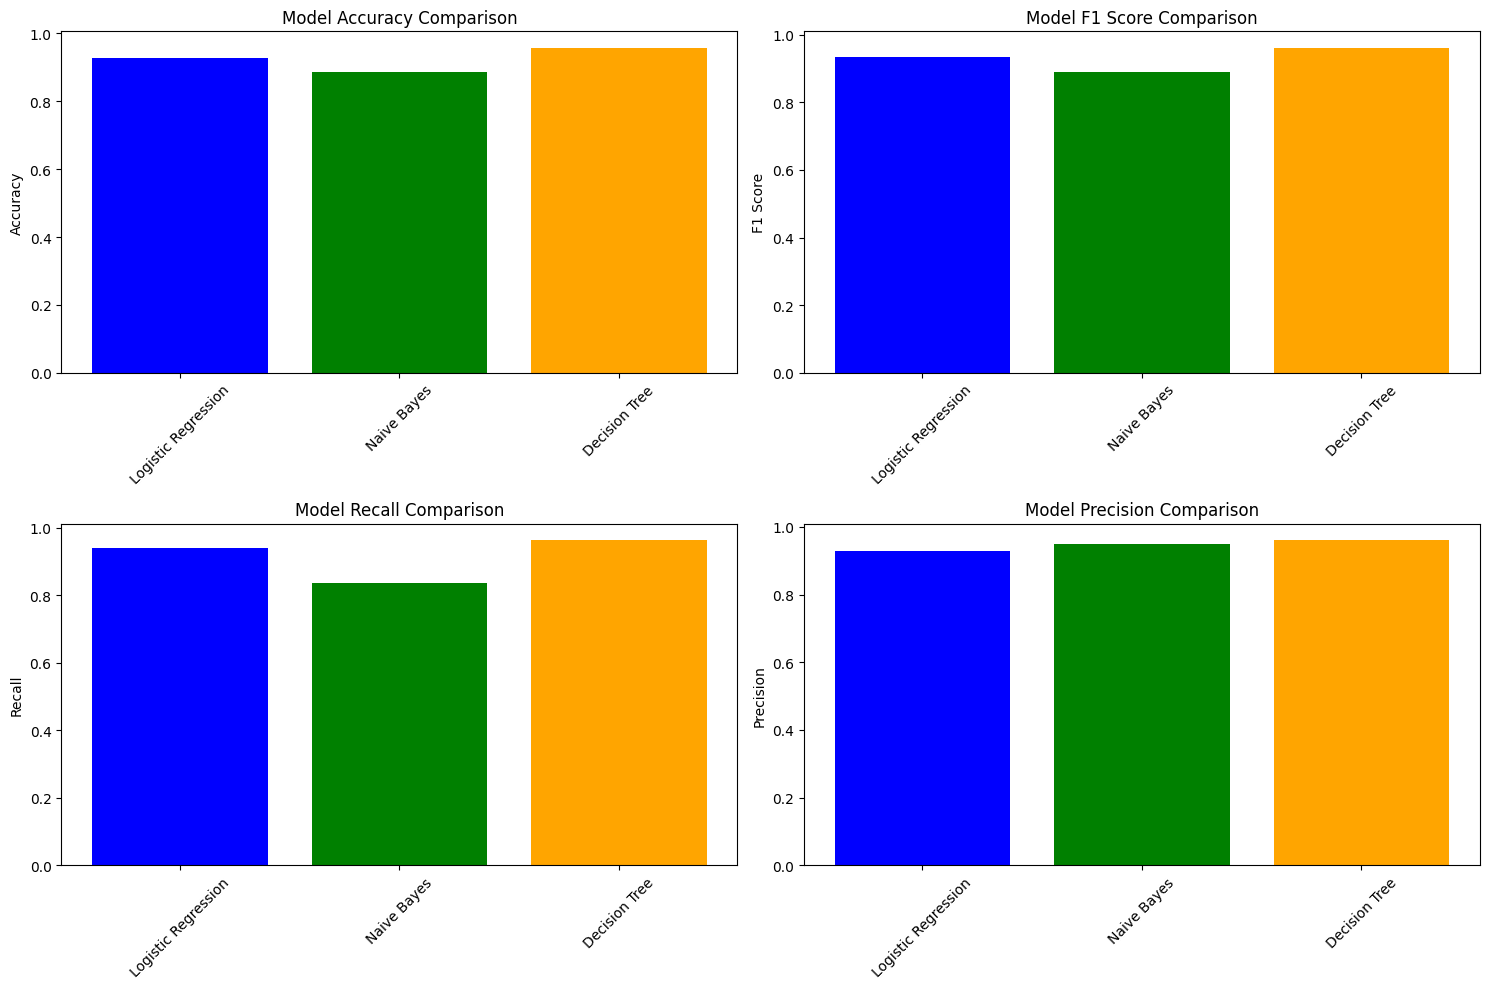

In [21]:
# Visualizing model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy comparison
axes[0, 0].bar(results_df['ML Model'], results_df['Accuracy'], color=['blue', 'green', 'orange'])
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# F1 Score comparison
axes[0, 1].bar(results_df['ML Model'], results_df['F1 Score'], color=['blue', 'green', 'orange'])
axes[0, 1].set_title('Model F1 Score Comparison')
axes[0, 1].set_ylabel('F1 Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# Recall comparison
axes[1, 0].bar(results_df['ML Model'], results_df['Recall'], color=['blue', 'green', 'orange'])
axes[1, 0].set_title('Model Recall Comparison')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].tick_params(axis='x', rotation=45)

# Precision comparison
axes[1, 1].bar(results_df['ML Model'], results_df['Precision'], color=['blue', 'green', 'orange'])
axes[1, 1].set_title('Model Precision Comparison')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [22]:
# Save the best model
import os

# Create model directory if it doesn't exist
os.makedirs('model', exist_ok=True)

# Determine which model is the best and save it
if best_model_name == 'Logistic Regression':
    best_model_obj = log
elif best_model_name == 'Naive Bayes':
    best_model_obj = nb
else:  # Decision Tree
    best_model_obj = dt

# Save the best model
with open('model/model.pkl', 'wb') as f:
    pickle.dump(best_model_obj, f)

print(f"Best model ({best_model_name}) saved successfully as 'model/model.pkl'")

# Save model information
model_info = {
    'model_name': best_model_name,
    'accuracy': best_accuracy,
    'feature_count': X.shape[1],
    'training_samples': X_train.shape[0],
    'test_samples': X_test.shape[0]
}

with open('model/model_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print("Model information saved successfully as 'model/model_info.pkl'")

Best model (Decision Tree) saved successfully as 'model/model.pkl'
Model information saved successfully as 'model/model_info.pkl'


## 7. Conclusion:

In this simplified phishing URL detection project, we successfully:

1. **Loaded and analyzed** the phishing dataset with 30+ features
2. **Performed EDA** to understand data distribution and patterns
3. **Trained three machine learning models**:
   - Logistic Regression
   - Naive Bayes (Gaussian)
   - Decision Tree Classifier
4. **Compared model performance** using multiple metrics (Accuracy, F1-Score, Recall, Precision)
5. **Selected and saved the best performing model** for deployment

### Key Observations:
- All three models showed competitive performance on the phishing detection task
- The dataset appears to be well-balanced for classification
- The best model has been saved and is ready for integration with the Flask web application

### Next Steps:
1. **Deploy the saved model** in the Flask application (`src/app.py`)
2. **Test the web interface** with various URLs
3. **Monitor model performance** in production

The simplified approach successfully reduces complexity while maintaining effective phishing detection capabilities.

✅ Simplified decision tree saved as 'decision_tree_simplified.png'


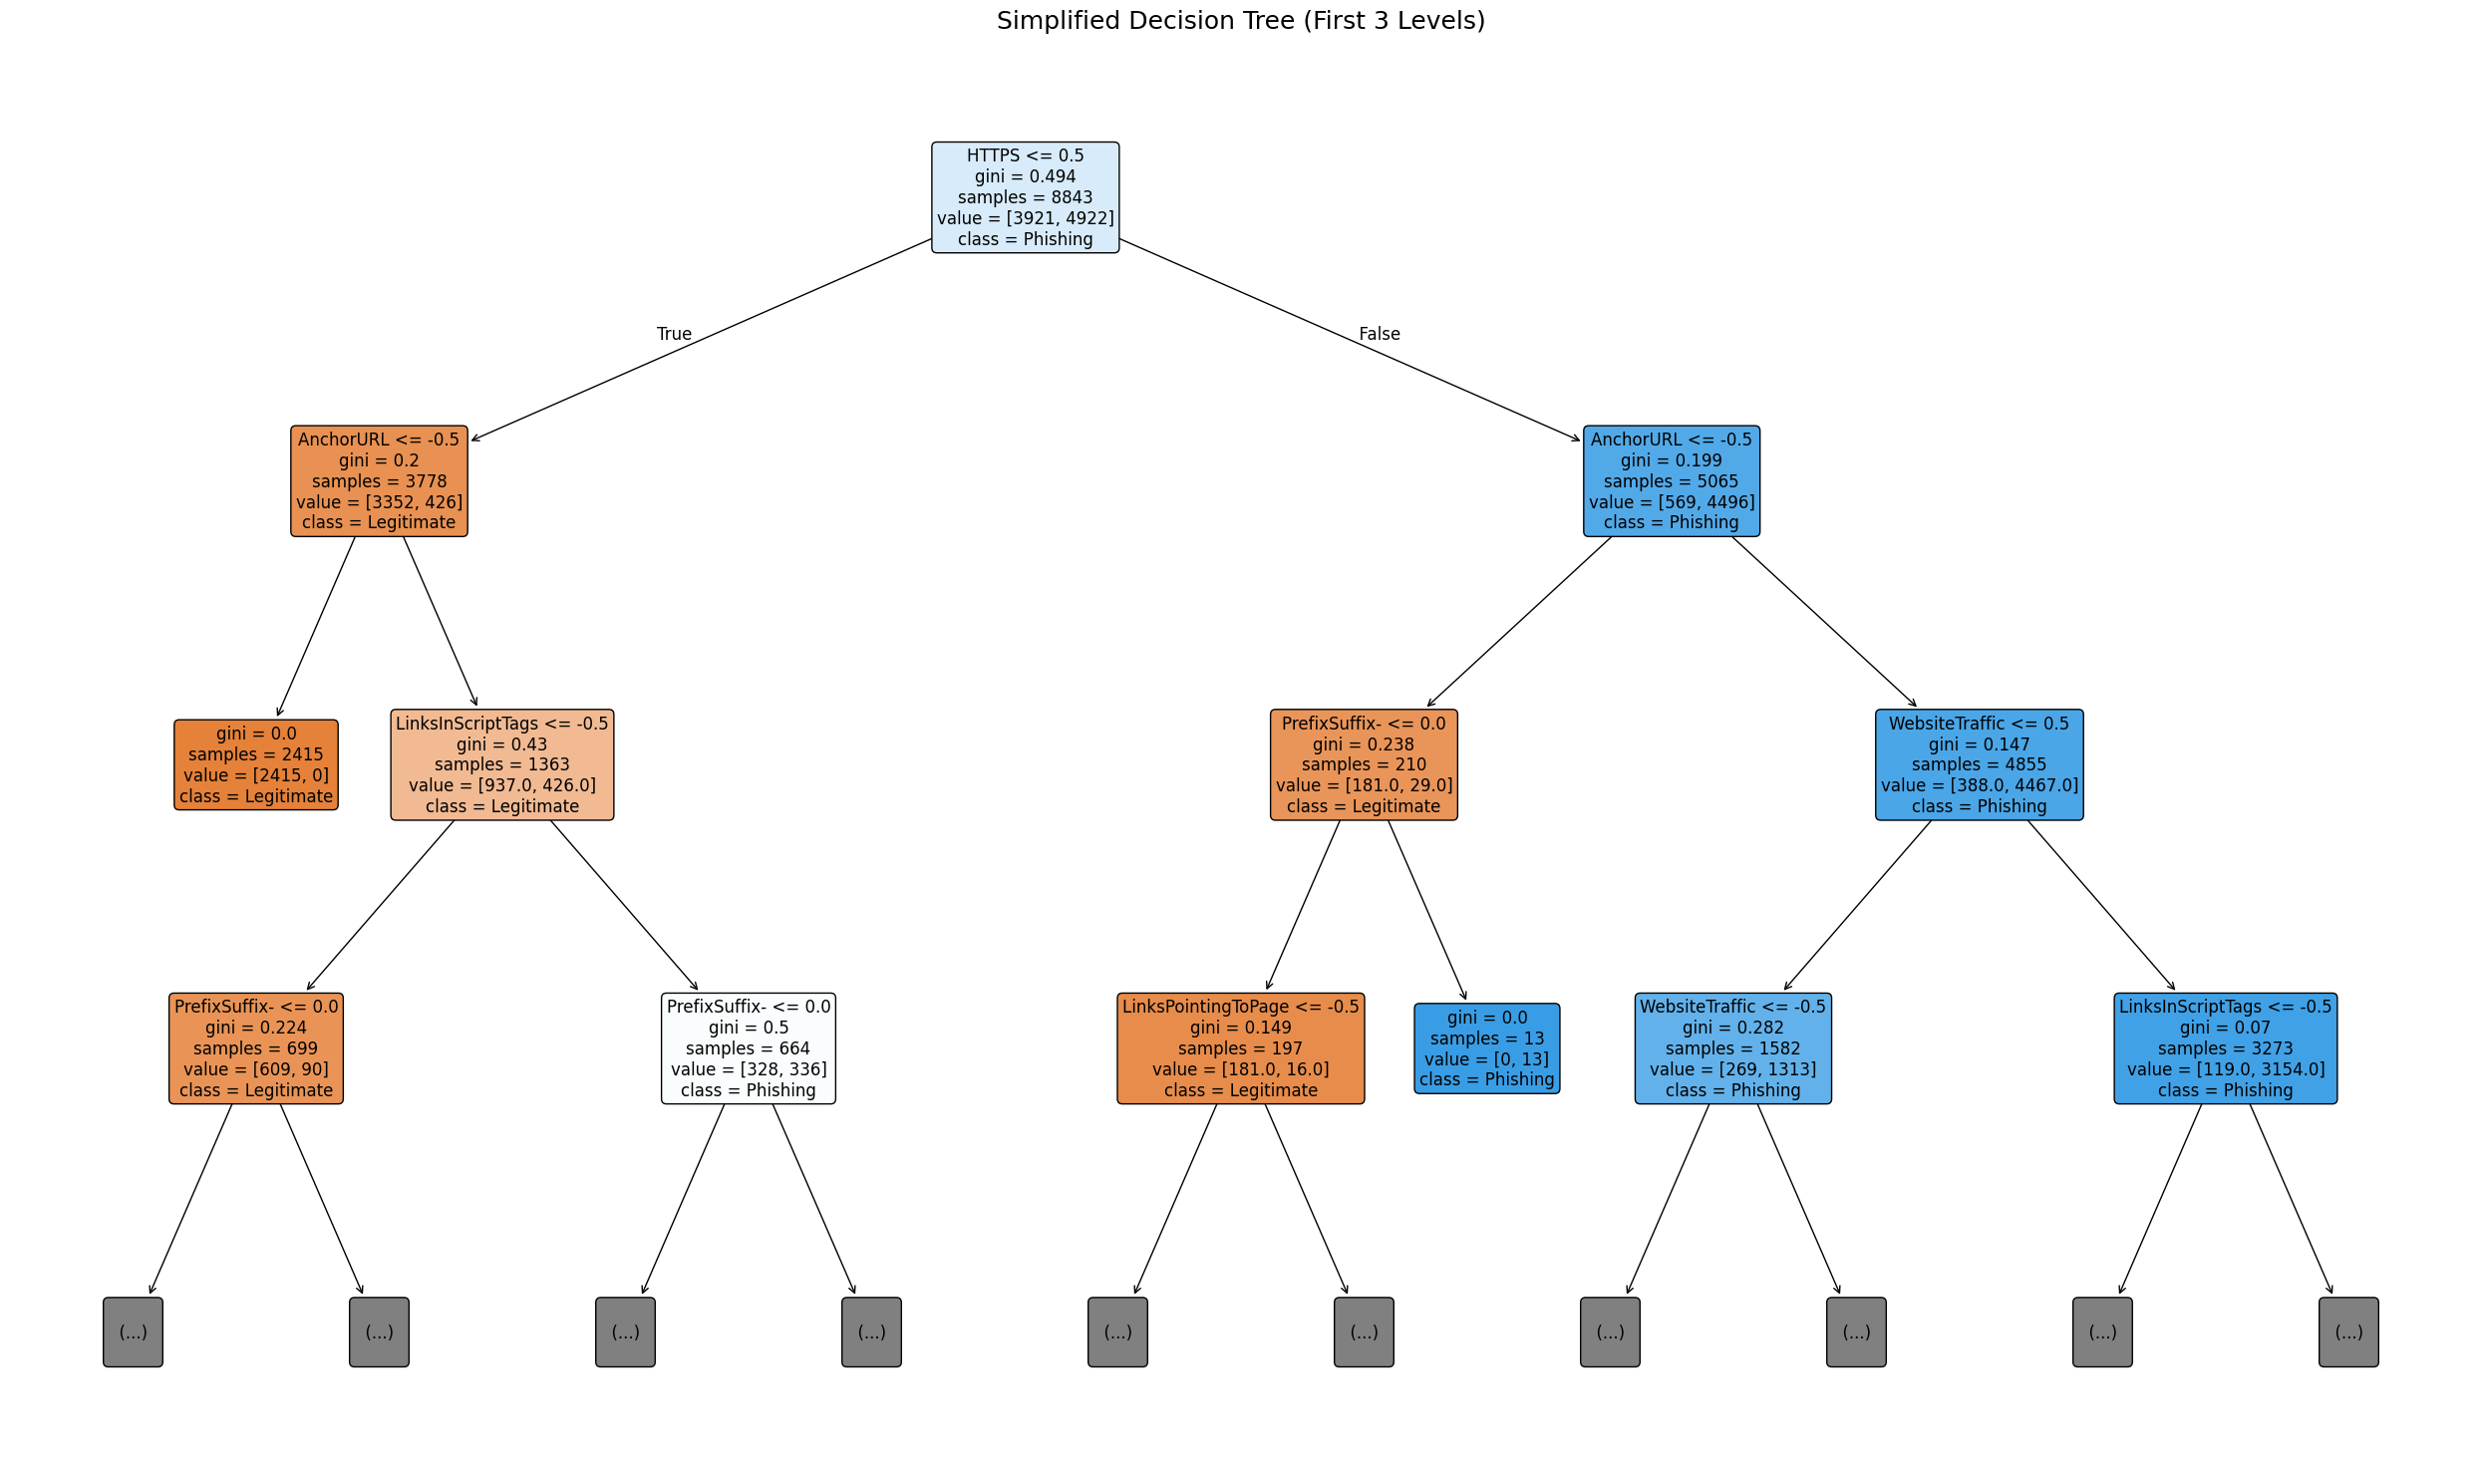

In [25]:
# ========== VISUALIZATION 2: Simplified Decision Tree (Limited Depth) ==========
# For better readability in presentations
plt.figure(figsize=(25, 15))
plot_tree(dt, 
          feature_names=X.columns.tolist(),
          class_names=['Legitimate', 'Phishing'],
          filled=True,
          rounded=True,
          fontsize=12,
          max_depth=3)  # Only show first 3 levels
plt.title("Simplified Decision Tree (First 3 Levels)", fontsize=18, pad=20)
plt.tight_layout()
plt.savefig('decision_tree_simplified.png', dpi=300, bbox_inches='tight')
print("✅ Simplified decision tree saved as 'decision_tree_simplified.png'")
plt.show()



✅ Confusion matrix saved as 'naive_bayes_confusion_matrix.png'


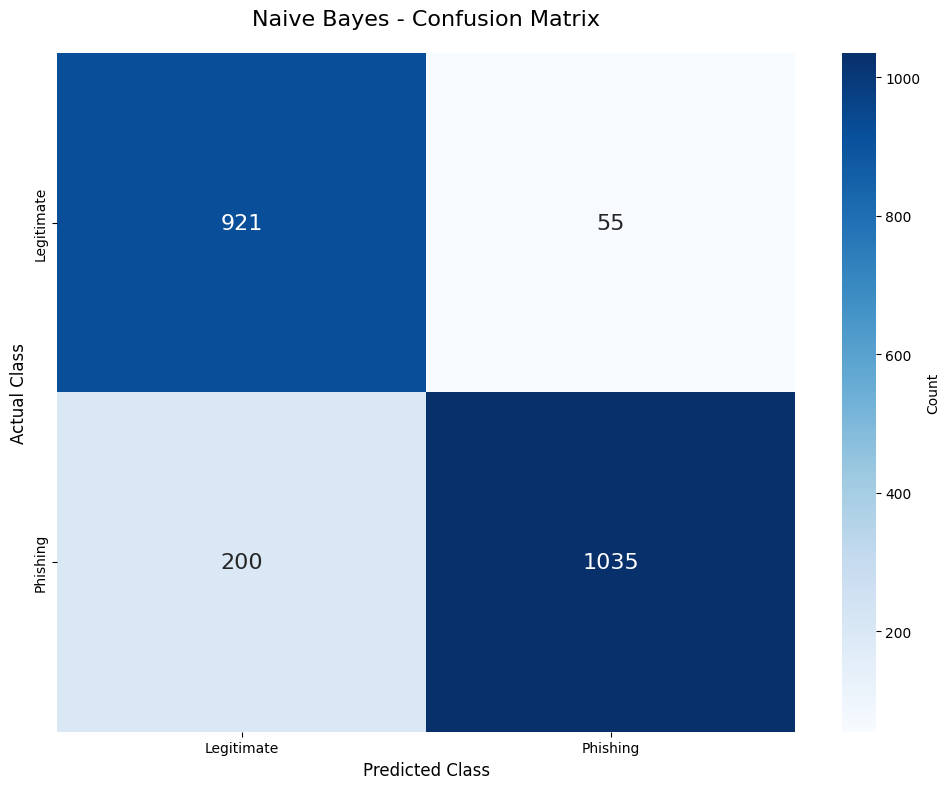


Confusion Matrix Interpretation:
True Positives (TP): 1035 - Correctly identified phishing URLs
True Negatives (TN): 921 - Correctly identified legitimate URLs
False Positives (FP): 55 - Legitimate URLs incorrectly classified as phishing
False Negatives (FN): 200 - Phishing URLs incorrectly classified as legitimate


In [29]:
# ========== VISUALIZATION 1: Confusion Matrix ==========
plt.figure(figsize=(10, 8))
cm = metrics.confusion_matrix(y_test, y_test_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'],
            cbar_kws={'label': 'Count'},
            annot_kws={'size': 16})
plt.title('Naive Bayes - Confusion Matrix', fontsize=16, pad=20)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.tight_layout()
plt.savefig('naive_bayes_confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\n✅ Confusion matrix saved as 'naive_bayes_confusion_matrix.png'")
plt.show()

# Print confusion matrix interpretation for Naive Bayes
print("\nConfusion Matrix Interpretation:")
print("True Positives (TP):", cm[1, 1], "- Correctly identified phishing URLs")
print("True Negatives (TN):", cm[0, 0], "- Correctly identified legitimate URLs")
print("False Positives (FP):", cm[0, 1], "- Legitimate URLs incorrectly classified as phishing")                   
print("False Negatives (FN):", cm[1, 0], "- Phishing URLs incorrectly classified as legitimate")




✅ Decision Tree confusion matrix saved as 'decision_tree_confusion_matrix.png'


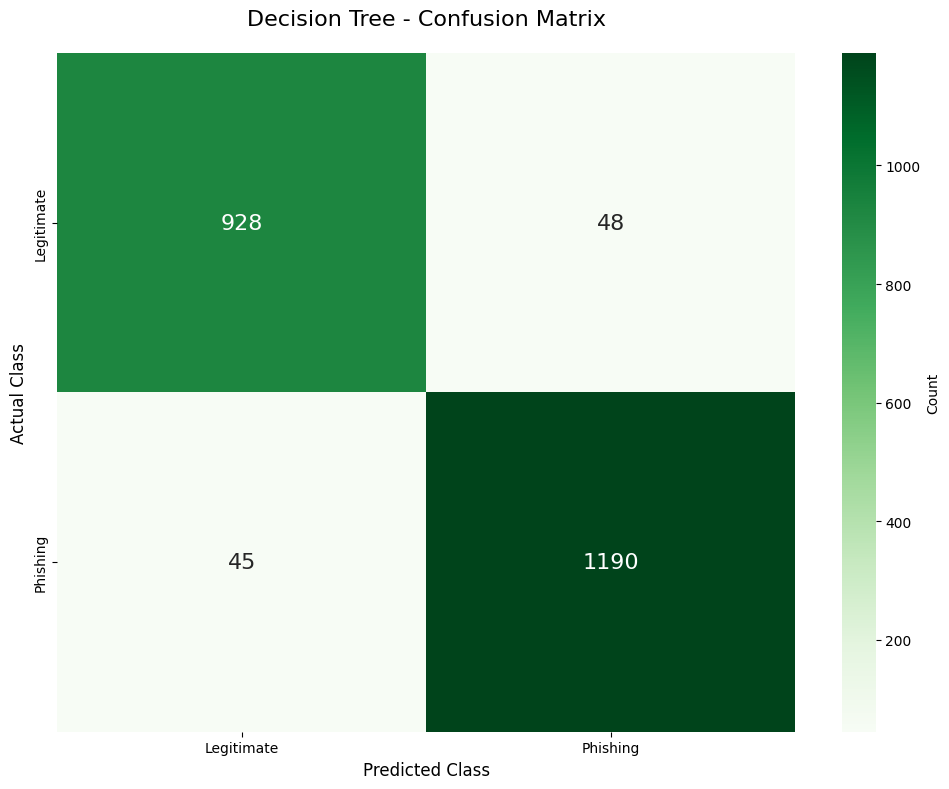


Confusion Matrix Breakdown:
True Negatives (Legitimate correctly classified): 928
False Positives (Legitimate wrongly classified as Phishing): 48
False Negatives (Phishing wrongly classified as Legitimate): 45
True Positives (Phishing correctly classified): 1190


In [28]:
# ========== VISUALIZATION: Decision Tree Confusion Matrix ==========
plt.figure(figsize=(10, 8))
cm_dt = metrics.confusion_matrix(y_test, y_test_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'],
            cbar_kws={'label': 'Count'},
            annot_kws={'size': 16})
plt.title('Decision Tree - Confusion Matrix', fontsize=16, pad=20)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.tight_layout()
plt.savefig('decision_tree_confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\n✅ Decision Tree confusion matrix saved as 'decision_tree_confusion_matrix.png'")
plt.show()

# Print confusion matrix interpretation
print("\nConfusion Matrix Breakdown:")
print(f"True Negatives (Legitimate correctly classified): {cm_dt[0][0]}")
print(f"False Positives (Legitimate wrongly classified as Phishing): {cm_dt[0][1]}")
print(f"False Negatives (Phishing wrongly classified as Legitimate): {cm_dt[1][0]}")
print(f"True Positives (Phishing correctly classified): {cm_dt[1][1]}")


✅ Logistic Regression confusion matrix saved as 'logistic_regression_confusion_matrix.png'


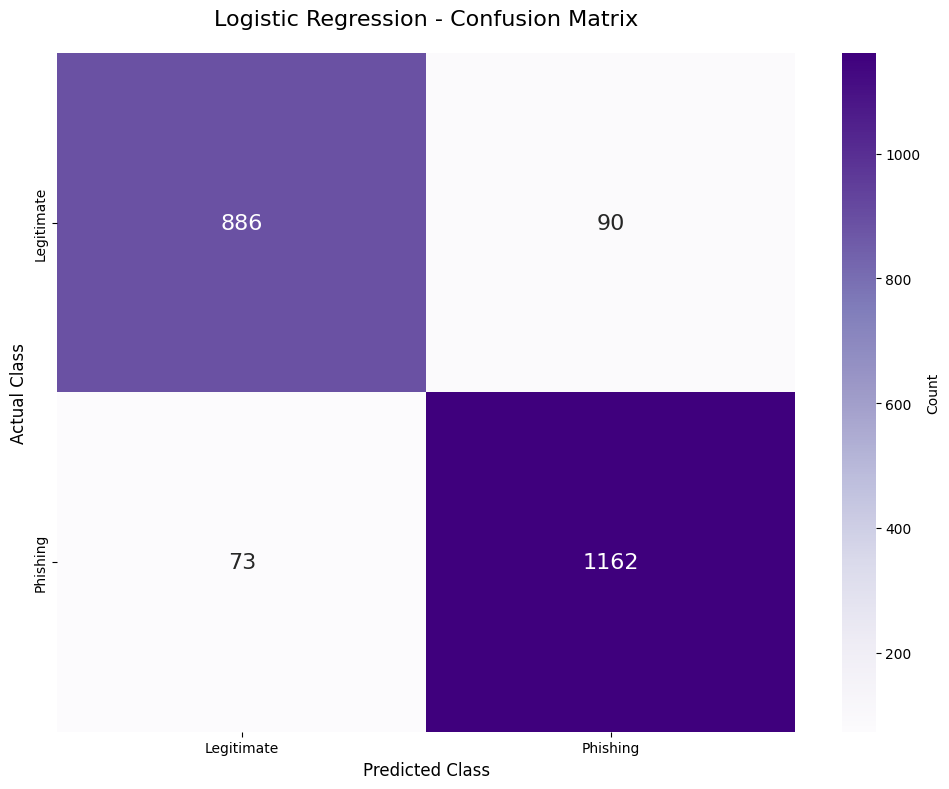


Confusion Matrix Interpretation:
True Negatives (Legitimate correctly classified): 886
False Positives (Legitimate wrongly classified as Phishing): 90
False Negatives (Phishing wrongly classified as Legitimate): 73
True Positives (Phishing correctly classified): 1162


In [30]:

# ========== LOGISTIC REGRESSION VISUALIZATIONS ==========

# 1. Confusion Matrix
plt.figure(figsize=(10, 8))
cm_log = metrics.confusion_matrix(y_test, y_test_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'],
            cbar_kws={'label': 'Count'},
            annot_kws={'size': 16})
plt.title('Logistic Regression - Confusion Matrix', fontsize=16, pad=20)
plt.ylabel('Actual Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.tight_layout()
plt.savefig('logistic_regression_confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\n✅ Logistic Regression confusion matrix saved as 'logistic_regression_confusion_matrix.png'")
plt.show()

# Print confusion matrix interpretation
print("\nConfusion Matrix Interpretation:")
print(f"True Negatives (Legitimate correctly classified): {cm_log[0][0]}")
print(f"False Positives (Legitimate wrongly classified as Phishing): {cm_log[0][1]}")
print(f"False Negatives (Phishing wrongly classified as Legitimate): {cm_log[1][0]}")
print(f"True Positives (Phishing correctly classified): {cm_log[1][1]}")

✅ Feature coefficients saved as 'logistic_regression_coefficients.png'


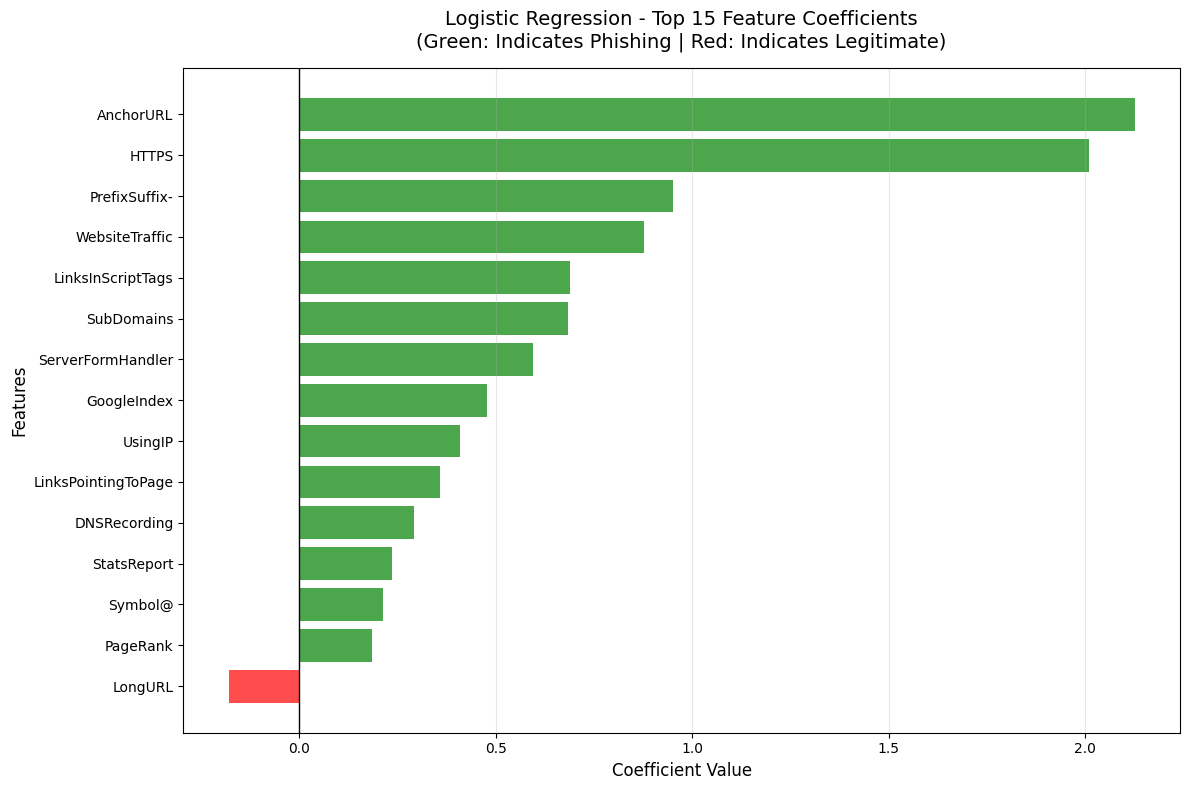


Top 10 Most Important Features (by absolute coefficient value):
AnchorURL                        2.1259  → Phishing
HTTPS                            2.0096  → Phishing
PrefixSuffix-                    0.9515  → Phishing
WebsiteTraffic                   0.8763  → Phishing
LinksInScriptTags                0.6896  → Phishing
SubDomains                       0.6854  → Phishing
ServerFormHandler                0.5947  → Phishing
GoogleIndex                      0.4793  → Phishing
UsingIP                          0.4090  → Phishing
LinksPointingToPage              0.3574  → Phishing


In [31]:
# 2. Feature Coefficients (Feature Importance for Logistic Regression)

# Get coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

# Top 15 features
top_15_features = coefficients_df.head(15)

plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in top_15_features['Coefficient']]
plt.barh(top_15_features['Feature'], top_15_features['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Logistic Regression - Top 15 Feature Coefficients\n(Green: Indicates Phishing | Red: Indicates Legitimate)', 
          fontsize=14, pad=15)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('logistic_regression_coefficients.png', dpi=300, bbox_inches='tight')
print("✅ Feature coefficients saved as 'logistic_regression_coefficients.png'")
plt.show()

# Print top 10 coefficients
print("\nTop 10 Most Important Features (by absolute coefficient value):")
print("="*70)
for i, row in coefficients_df.head(10).iterrows():
    direction = "→ Phishing" if row['Coefficient'] > 0 else "→ Legitimate"
    print(f"{row['Feature']:<30} {row['Coefficient']:>8.4f}  {direction}")

✅ Complete workflow saved as 'logistic_regression_complete_workflow.png'


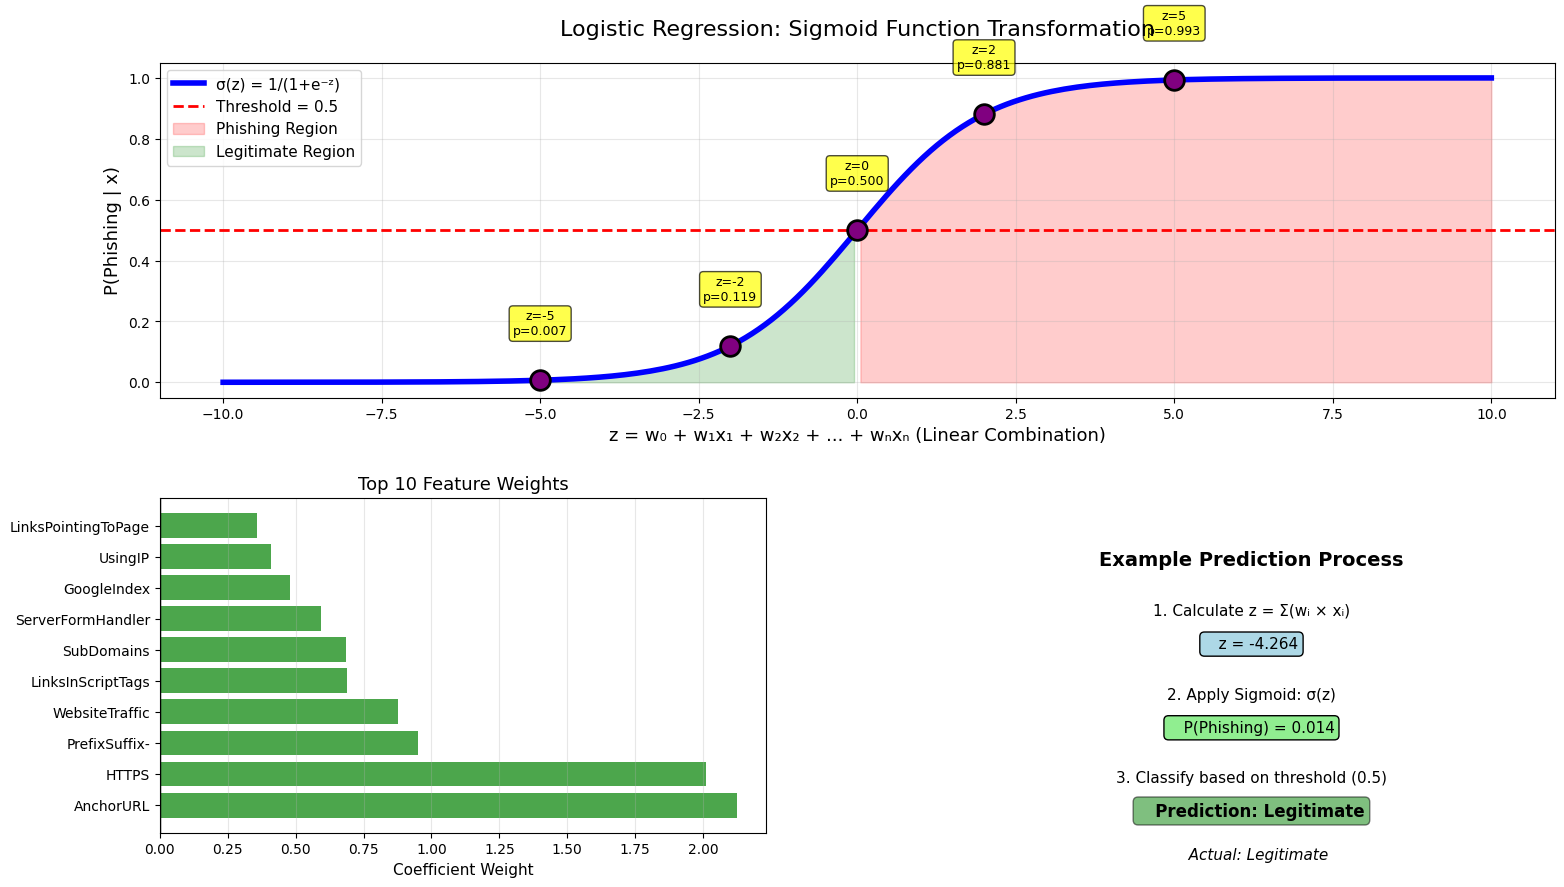


HOW LOGISTIC REGRESSION WORKS (Step-by-Step)

1. LINEAR COMBINATION:
   z = w₀ + w₁×x₁ + w₂×x₂ + ... + wₙ×xₙ
   (Multiply each feature by its weight and sum them up)

2. SIGMOID TRANSFORMATION:
   P(Phishing) = 1 / (1 + e^(-z))
   (Convert linear output to probability between 0 and 1)

3. CLASSIFICATION:
   If P(Phishing) ≥ 0.5 → Predict: Phishing
   If P(Phishing) < 0.5 → Predict: Legitimate


In [33]:
# 4. Combined Visualization: How Logistic Regression Works

import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Top: Sigmoid curve
ax1 = fig.add_subplot(gs[0, :])
z = np.linspace(-10, 10, 200)
y = sigmoid(z)
ax1.plot(z, y, 'b-', linewidth=4, label='σ(z) = 1/(1+e⁻ᶻ)')
ax1.axhline(y=0.5, color='r', linestyle='--', linewidth=2, label='Threshold = 0.5')
ax1.fill_between(z, 0, y, where=(y >= 0.5), alpha=0.2, color='red', label='Phishing Region')
ax1.fill_between(z, 0, y, where=(y < 0.5), alpha=0.2, color='green', label='Legitimate Region')
ax1.set_xlabel('z = w₀ + w₁x₁ + w₂x₂ + ... + wₙxₙ (Linear Combination)', fontsize=13)
ax1.set_ylabel('P(Phishing | x)', fontsize=13)
ax1.set_title('Logistic Regression: Sigmoid Function Transformation', fontsize=16, pad=20)
ax1.legend(fontsize=11, loc='upper left')
ax1.grid(alpha=0.3)

# Add example points
example_z = [-5, -2, 0, 2, 5]
example_prob = sigmoid(np.array(example_z))
ax1.scatter(example_z, example_prob, s=200, c='purple', zorder=5, edgecolors='black', linewidth=2)
for z_val, p_val in zip(example_z, example_prob):
    ax1.annotate(f'z={z_val}\np={p_val:.3f}', 
                xy=(z_val, p_val), xytext=(z_val, p_val + 0.15),
                fontsize=9, ha='center',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Bottom left: Feature importance
ax2 = fig.add_subplot(gs[1, 0])
top_features = coefficients_df.head(10)
colors = ['red' if x < 0 else 'green' for x in top_features['Coefficient']]
ax2.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
ax2.set_yticks(range(len(top_features)))
ax2.set_yticklabels(top_features['Feature'])
ax2.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax2.set_xlabel('Coefficient Weight', fontsize=11)
ax2.set_title('Top 10 Feature Weights', fontsize=13)
ax2.grid(axis='x', alpha=0.3)

# Bottom right: Prediction example
ax3 = fig.add_subplot(gs[1, 1])
sample_idx = 0
sample_features = X_test.iloc[sample_idx]
sample_z = log.decision_function([sample_features])[0]
sample_prob = sigmoid(sample_z)
actual_class = "Phishing" if y_test.iloc[sample_idx] == 1 else "Legitimate"

ax3.text(0.5, 0.8, f'Example Prediction Process', fontsize=14, ha='center', weight='bold')
ax3.text(0.5, 0.65, f'1. Calculate z = Σ(wᵢ × xᵢ)', fontsize=11, ha='center')
ax3.text(0.5, 0.55, f'   z = {sample_z:.3f}', fontsize=11, ha='center', 
        bbox=dict(boxstyle='round', facecolor='lightblue'))
ax3.text(0.5, 0.4, f'2. Apply Sigmoid: σ(z)', fontsize=11, ha='center')
ax3.text(0.5, 0.3, f'   P(Phishing) = {sample_prob:.3f}', fontsize=11, ha='center',
        bbox=dict(boxstyle='round', facecolor='lightgreen'))
ax3.text(0.5, 0.15, f'3. Classify based on threshold (0.5)', fontsize=11, ha='center')
prediction = "Phishing" if sample_prob >= 0.5 else "Legitimate"
pred_color = 'red' if prediction == "Phishing" else 'green'
ax3.text(0.5, 0.05, f'   Prediction: {prediction}', fontsize=12, ha='center', weight='bold',
        bbox=dict(boxstyle='round', facecolor=pred_color, alpha=0.5))
ax3.text(0.5, -0.08, f'   Actual: {actual_class}', fontsize=11, ha='center', style='italic')
ax3.axis('off')

plt.savefig('logistic_regression_complete_workflow.png', dpi=300, bbox_inches='tight')
print("✅ Complete workflow saved as 'logistic_regression_complete_workflow.png'")
plt.show()

print("\n" + "="*80)
print("HOW LOGISTIC REGRESSION WORKS (Step-by-Step)")
print("="*80)
print("\n1. LINEAR COMBINATION:")
print("   z = w₀ + w₁×x₁ + w₂×x₂ + ... + wₙ×xₙ")
print("   (Multiply each feature by its weight and sum them up)")
print("\n2. SIGMOID TRANSFORMATION:")
print("   P(Phishing) = 1 / (1 + e^(-z))")
print("   (Convert linear output to probability between 0 and 1)")
print("\n3. CLASSIFICATION:")
print("   If P(Phishing) ≥ 0.5 → Predict: Phishing")
print("   If P(Phishing) < 0.5 → Predict: Legitimate")
print("="*80)

✅ Complete bell curve workflow saved as 'naive_bayes_bell_curve_workflow.png'


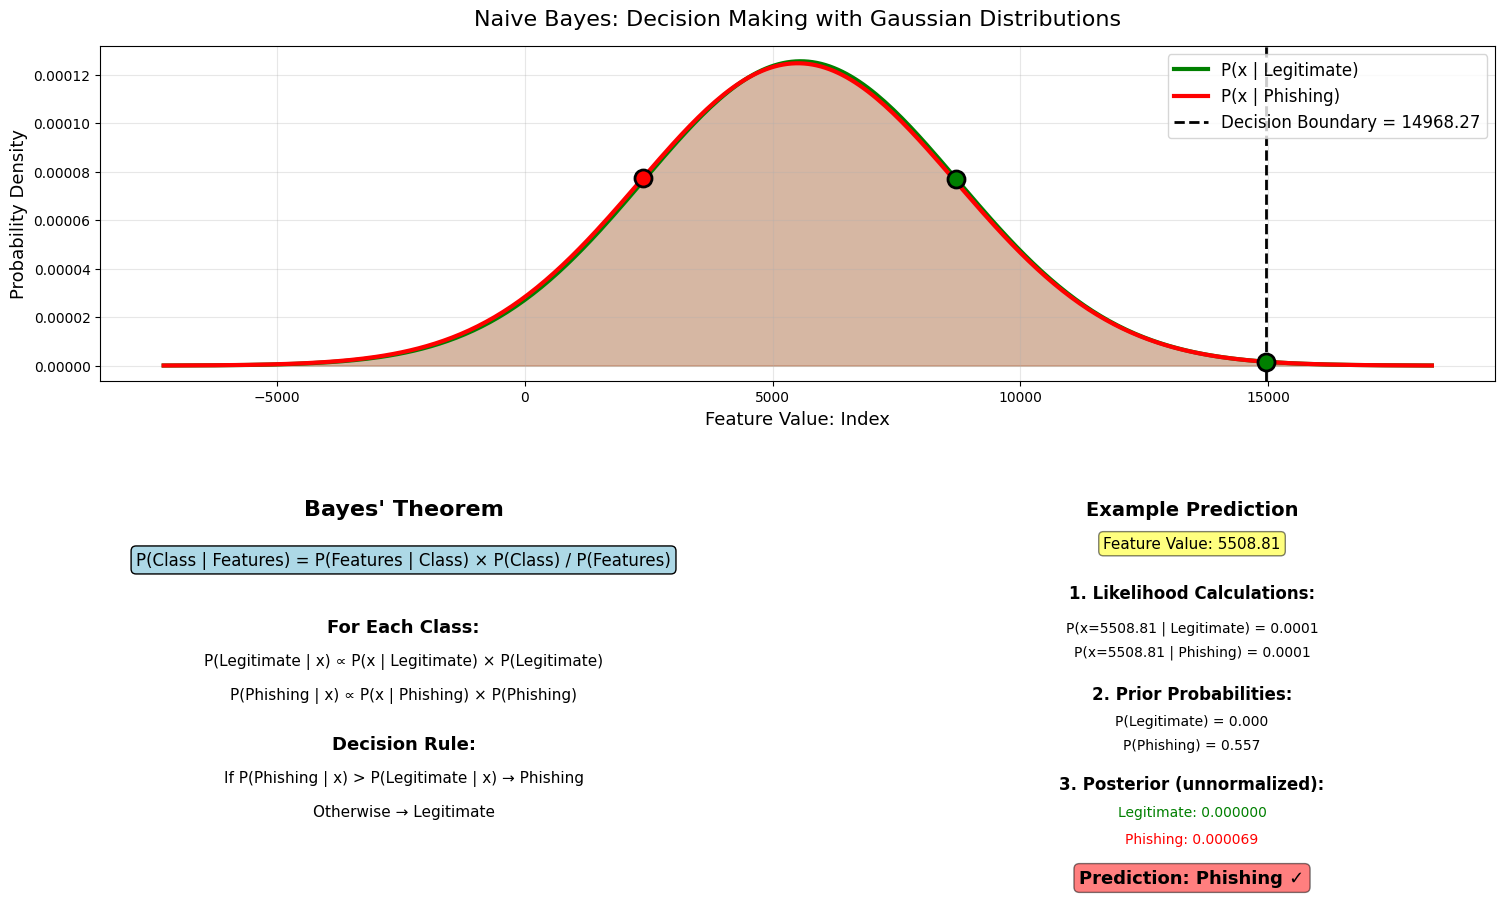


HOW NAIVE BAYES WORKS WITH BELL CURVES

1. TRAINING PHASE:
   For each feature and each class:
   • Calculate mean (μ) and standard deviation (σ)
   • Store these parameters to define Gaussian distributions

2. PREDICTION PHASE:
   For a new URL with feature value x:
   • Calculate P(x | Legitimate) using Gaussian formula
   • Calculate P(x | Phishing) using Gaussian formula
   • Apply Bayes' theorem with class priors
   • Choose class with higher posterior probability

3. GAUSSIAN FORMULA:
   P(x | class) = (1/√(2πσ²)) × e^(-(x-μ)²/(2σ²))
   This creates the bell curve shape!


In [36]:
from scipy.stats import norm

# 3. How Naive Bayes Makes Predictions Using Bell Curves

# Define class_0_data and class_1_data using X_train and y_train
class_0_data = X_train[y_train == -1]
class_1_data = X_train[y_train == 1]

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Top: Overlapping bell curves with decision boundary
ax1 = fig.add_subplot(gs[0, :])

feature_name = X.columns[0]
mean_0 = class_0_data[feature_name].mean()
std_0 = class_0_data[feature_name].std()
mean_1 = class_1_data[feature_name].mean()
std_1 = class_1_data[feature_name].std()

x = np.linspace(min(mean_0 - 4*std_0, mean_1 - 4*std_1), 
                max(mean_0 + 4*std_0, mean_1 + 4*std_1), 300)

y_0 = norm.pdf(x, mean_0, std_0)
y_1 = norm.pdf(x, mean_1, std_1)

ax1.plot(x, y_0, 'g-', linewidth=3, label='P(x | Legitimate)')
ax1.plot(x, y_1, 'r-', linewidth=3, label='P(x | Phishing)')
ax1.fill_between(x, y_0, alpha=0.2, color='green')
ax1.fill_between(x, y_1, alpha=0.2, color='red')

# Find intersection point (decision boundary)
intersection_idx = np.argmin(np.abs(y_0 - y_1))
decision_boundary = x[intersection_idx]
ax1.axvline(decision_boundary, color='black', linestyle='--', linewidth=2, 
            label=f'Decision Boundary = {decision_boundary:.2f}')

# Example predictions
test_points = [mean_0 - std_0, decision_boundary, mean_1 + std_1]
for tp in test_points:
    prob_0 = norm.pdf(tp, mean_0, std_0)
    prob_1 = norm.pdf(tp, mean_1, std_1)
    color = 'green' if prob_0 > prob_1 else 'red'
    ax1.scatter([tp], [max(prob_0, prob_1)], s=150, c=color, 
               edgecolors='black', linewidth=2, zorder=5)

ax1.set_xlabel(f'Feature Value: {feature_name}', fontsize=13)
ax1.set_ylabel('Probability Density', fontsize=13)
ax1.set_title('Naive Bayes: Decision Making with Gaussian Distributions', fontsize=16, pad=15)
ax1.legend(fontsize=12, loc='upper right')
ax1.grid(alpha=0.3)

# Bottom-left: Bayes formula visualization
ax2 = fig.add_subplot(gs[1, 0])
ax2.text(0.5, 0.9, "Bayes' Theorem", fontsize=16, ha='center', fontweight='bold')
ax2.text(0.5, 0.75, "P(Class | Features) = P(Features | Class) × P(Class) / P(Features)", 
         fontsize=12, ha='center', bbox=dict(boxstyle='round', facecolor='lightblue'))

ax2.text(0.5, 0.55, "For Each Class:", fontsize=13, ha='center', fontweight='bold')
ax2.text(0.5, 0.45, "P(Legitimate | x) ∝ P(x | Legitimate) × P(Legitimate)", fontsize=11, ha='center')
ax2.text(0.5, 0.35, "P(Phishing | x) ∝ P(x | Phishing) × P(Phishing)", fontsize=11, ha='center')

ax2.text(0.5, 0.2, "Decision Rule:", fontsize=13, ha='center', fontweight='bold')
ax2.text(0.5, 0.1, "If P(Phishing | x) > P(Legitimate | x) → Phishing", fontsize=11, ha='center')
ax2.text(0.5, 0.0, "Otherwise → Legitimate", fontsize=11, ha='center')
ax2.axis('off')

# Bottom-right: Example calculation
ax3 = fig.add_subplot(gs[1, 1])
sample_value = mean_1  # Example: a value near phishing mean

likelihood_0 = norm.pdf(sample_value, mean_0, std_0)
likelihood_1 = norm.pdf(sample_value, mean_1, std_1)
prior_0 = (y_train == 0).sum() / len(y_train)
prior_1 = (y_train == 1).sum() / len(y_train)
posterior_0 = likelihood_0 * prior_0
posterior_1 = likelihood_1 * prior_1

ax3.text(0.5, 0.9, f'Example Prediction', fontsize=14, ha='center', fontweight='bold')
ax3.text(0.5, 0.8, f'Feature Value: {sample_value:.2f}', fontsize=11, ha='center',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

ax3.text(0.5, 0.65, f'1. Likelihood Calculations:', fontsize=12, ha='center', fontweight='bold')
ax3.text(0.5, 0.55, f'P(x={sample_value:.2f} | Legitimate) = {likelihood_0:.4f}', fontsize=10, ha='center')
ax3.text(0.5, 0.48, f'P(x={sample_value:.2f} | Phishing) = {likelihood_1:.4f}', fontsize=10, ha='center')

ax3.text(0.5, 0.35, f'2. Prior Probabilities:', fontsize=12, ha='center', fontweight='bold')
ax3.text(0.5, 0.27, f'P(Legitimate) = {prior_0:.3f}', fontsize=10, ha='center')
ax3.text(0.5, 0.20, f'P(Phishing) = {prior_1:.3f}', fontsize=10, ha='center')

ax3.text(0.5, 0.08, f'3. Posterior (unnormalized):', fontsize=12, ha='center', fontweight='bold')
ax3.text(0.5, 0.0, f'Legitimate: {posterior_0:.6f}', fontsize=10, ha='center', color='green')
ax3.text(0.5, -0.08, f'Phishing: {posterior_1:.6f}', fontsize=10, ha='center', color='red')

prediction = "Phishing" if posterior_1 > posterior_0 else "Legitimate"
pred_color = 'red' if prediction == "Phishing" else 'green'
ax3.text(0.5, -0.2, f'Prediction: {prediction} ✓', fontsize=13, ha='center', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor=pred_color, alpha=0.5))
ax3.axis('off')

plt.savefig('naive_bayes_bell_curve_workflow.png', dpi=300, bbox_inches='tight')
print("✅ Complete bell curve workflow saved as 'naive_bayes_bell_curve_workflow.png'")
plt.show()

print("\n" + "="*80)
print("HOW NAIVE BAYES WORKS WITH BELL CURVES")
print("="*80)
print("\n1. TRAINING PHASE:")
print("   For each feature and each class:")
print("   • Calculate mean (μ) and standard deviation (σ)")
print("   • Store these parameters to define Gaussian distributions")
print("\n2. PREDICTION PHASE:")
print("   For a new URL with feature value x:")
print("   • Calculate P(x | Legitimate) using Gaussian formula")
print("   • Calculate P(x | Phishing) using Gaussian formula")
print("   • Apply Bayes' theorem with class priors")
print("   • Choose class with higher posterior probability")
print("\n3. GAUSSIAN FORMULA:")
print("   P(x | class) = (1/√(2πσ²)) × e^(-(x-μ)²/(2σ²))")
print("   This creates the bell curve shape!")
print("="*80)

✅ 3D bell curves saved as 'naive_bayes_3d_bell_curves.png'


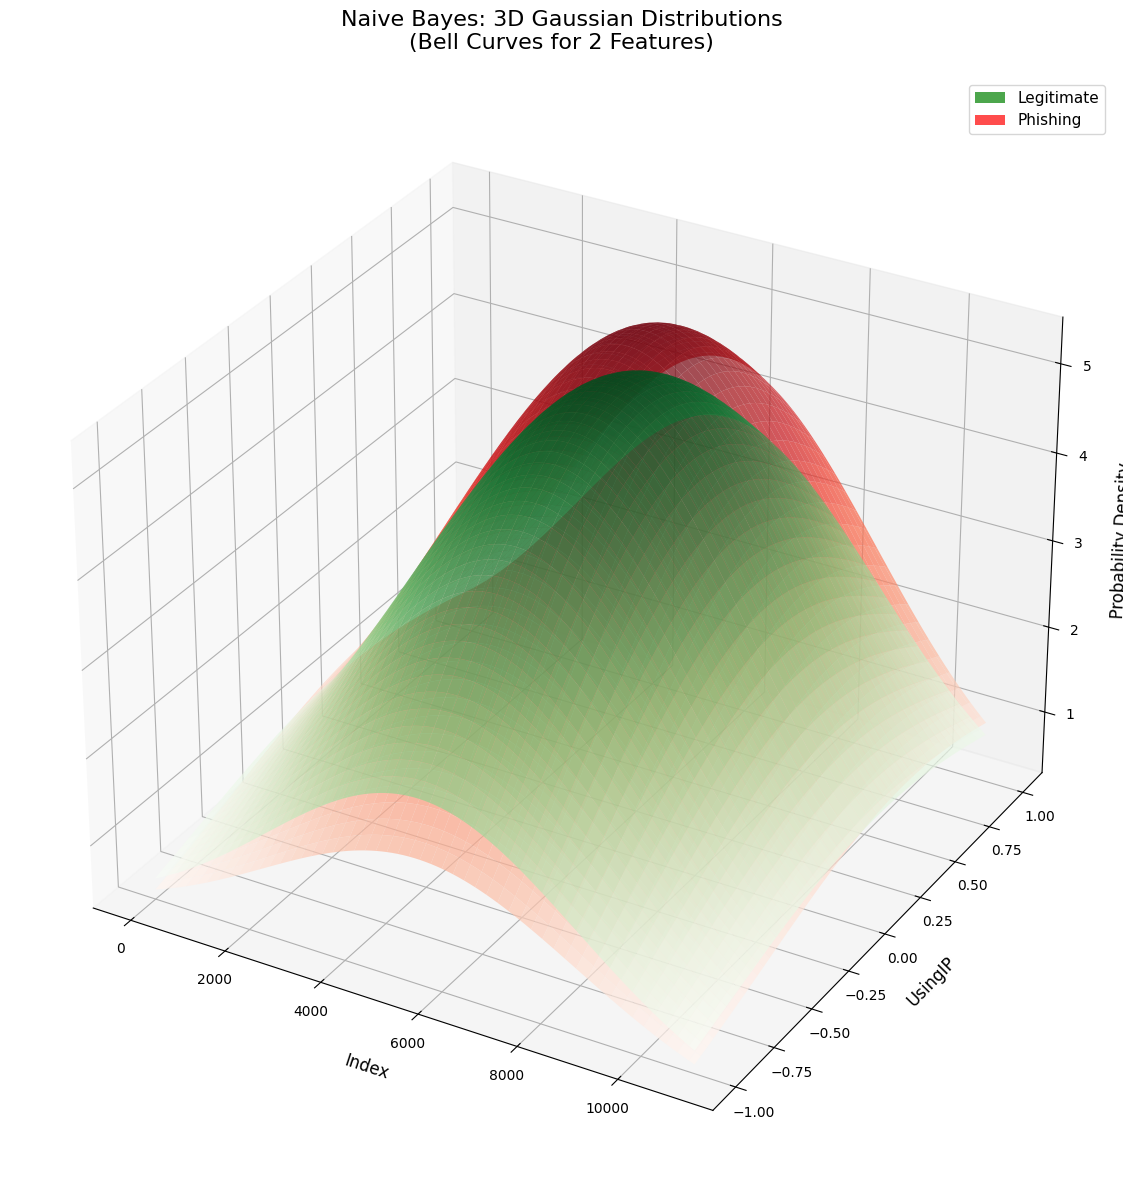

In [37]:
# 4. 3D Visualization: Multiple Feature Bell Curves

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12))

# Select 2 features for 3D visualization
feature_1 = X.columns[0]
feature_2 = X.columns[1]

# Create meshgrid
x1_range = np.linspace(X_train[feature_1].min(), X_train[feature_1].max(), 100)
x2_range = np.linspace(X_train[feature_2].min(), X_train[feature_2].max(), 100)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)

# Calculate 2D Gaussian for legitimate class
mean_1_leg = class_0_data[feature_1].mean()
std_1_leg = class_0_data[feature_1].std()
mean_2_leg = class_0_data[feature_2].mean()
std_2_leg = class_0_data[feature_2].std()

Z_legitimate = (1/(2*np.pi*std_1_leg*std_2_leg)) * \
               np.exp(-0.5*((X1_grid-mean_1_leg)**2/std_1_leg**2 + 
                           (X2_grid-mean_2_leg)**2/std_2_leg**2))

# Calculate 2D Gaussian for phishing class
mean_1_ph = class_1_data[feature_1].mean()
std_1_ph = class_1_data[feature_1].std()
mean_2_ph = class_1_data[feature_2].mean()
std_2_ph = class_1_data[feature_2].std()

Z_phishing = (1/(2*np.pi*std_1_ph*std_2_ph)) * \
             np.exp(-0.5*((X1_grid-mean_1_ph)**2/std_1_ph**2 + 
                         (X2_grid-mean_2_ph)**2/std_2_ph**2))

# Plot 3D surfaces
ax = fig.add_subplot(111, projection='3d')
surf1 = ax.plot_surface(X1_grid, X2_grid, Z_legitimate, cmap='Greens', 
                        alpha=0.7, edgecolor='none', label='Legitimate')
surf2 = ax.plot_surface(X1_grid, X2_grid, Z_phishing, cmap='Reds', 
                        alpha=0.7, edgecolor='none', label='Phishing')

ax.set_xlabel(f'{feature_1}', fontsize=12, labelpad=10)
ax.set_ylabel(f'{feature_2}', fontsize=12, labelpad=10)
ax.set_zlabel('Probability Density', fontsize=12, labelpad=10)
ax.set_title('Naive Bayes: 3D Gaussian Distributions\n(Bell Curves for 2 Features)', 
             fontsize=16, pad=20)

# Add legend manually (3D doesn't support surface legends well)
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', alpha=0.7, label='Legitimate'),
                   Patch(facecolor='red', alpha=0.7, label='Phishing')]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11)

plt.tight_layout()
plt.savefig('naive_bayes_3d_bell_curves.png', dpi=300, bbox_inches='tight')
print("✅ 3D bell curves saved as 'naive_bayes_3d_bell_curves.png'")
plt.show()